In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import os

# Load Data

In [3]:
medals = pd.read_excel("Data\Medals.xlsx", index_col=0)
athletes = pd.read_excel("Data\Athletes.xlsx", index_col=0)
coaches = pd.read_excel("Data\Coaches.xlsx", index_col=0)
gender = pd.read_excel("Data\EntriesGender.xlsx")
teams = pd.read_excel("Data\Teams.xlsx", index_col=0)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Exploratory Data Analysis (EDA)

## Medals

### Gold

<function matplotlib.pyplot.show(close=None, block=None)>

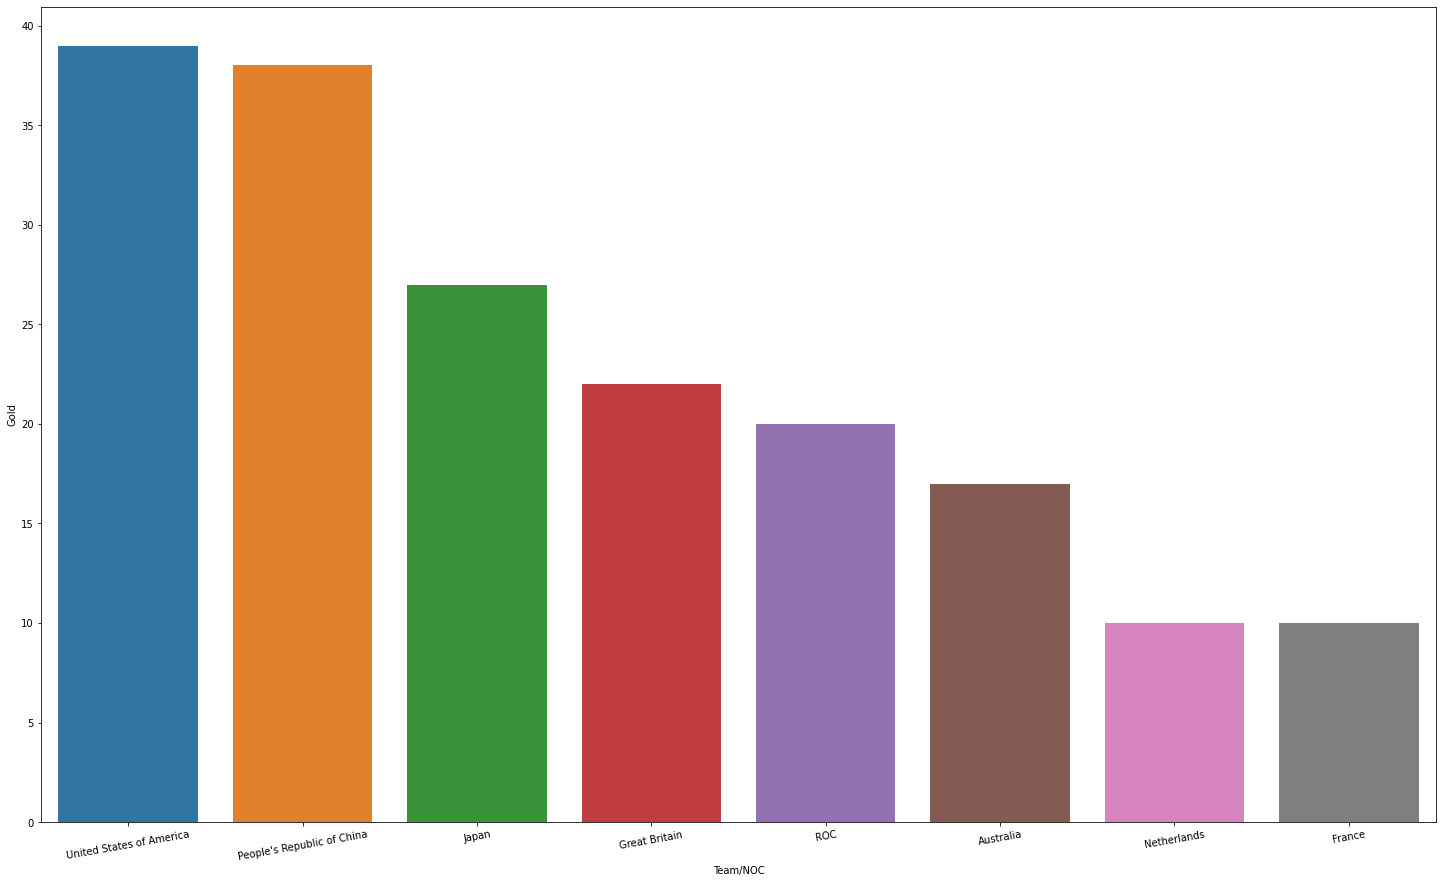

In [4]:
figure = plt.figure(figsize=(25,15))
sns.barplot(x=medals['Team/NOC'].head(8), y=medals['Gold'].head(8))
plt.xticks(rotation=10)
plt.show

### Silver

<function matplotlib.pyplot.show(close=None, block=None)>

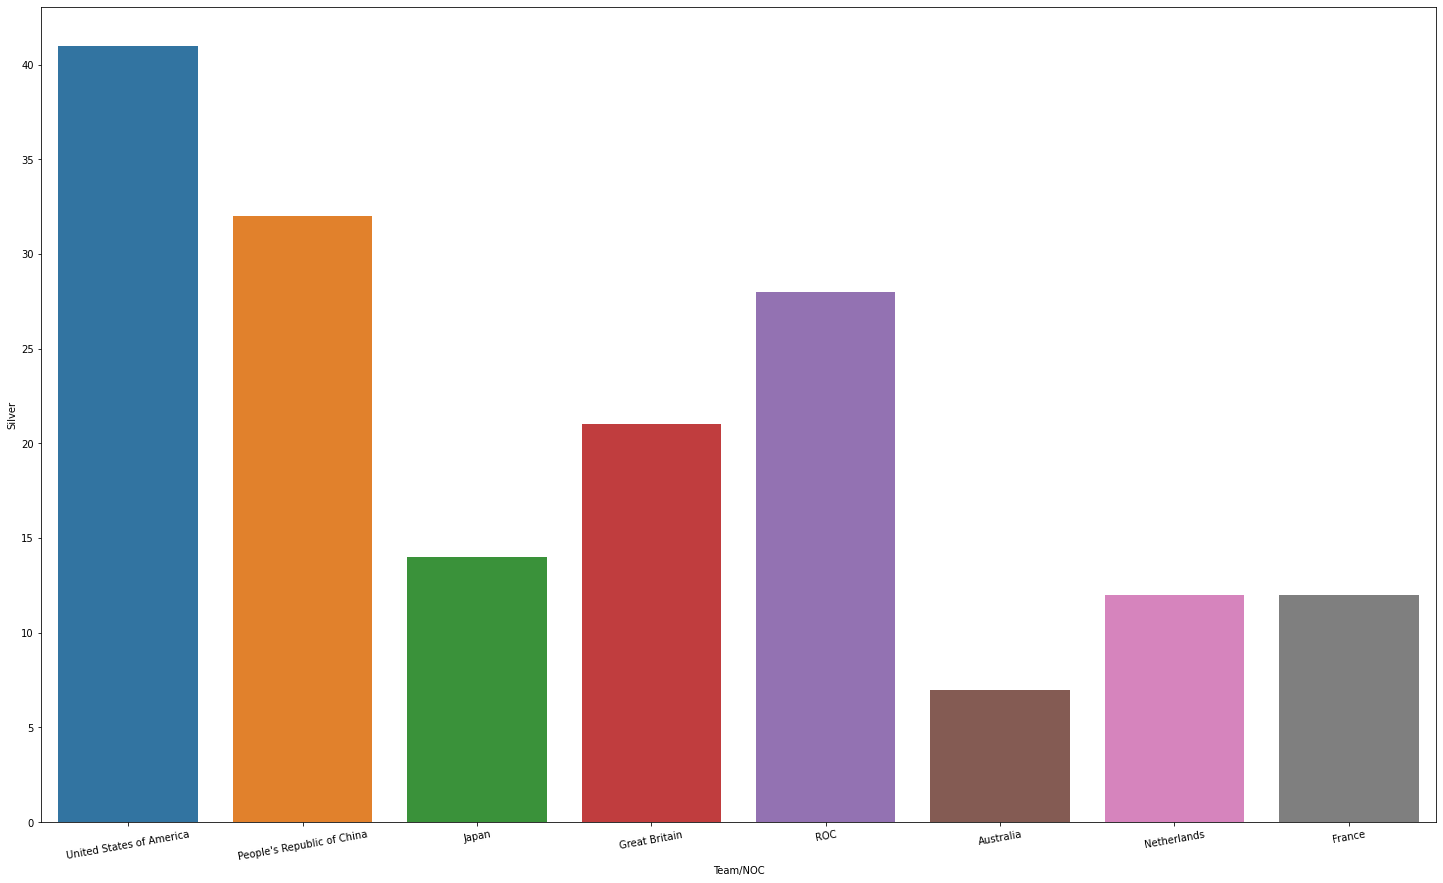

In [6]:
figure = plt.figure(figsize=(25,15))
sns.barplot(x=medals['Team/NOC'].head(8), y=medals['Silver'].head(8))
plt.xticks(rotation=10)
plt.show

In [20]:
medals.head()

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
Rank,,,,,,
1,United States of America,39,41,33,113,1
2,People's Republic of China,38,32,18,88,2
3,Japan,27,14,17,58,5
4,Great Britain,22,21,22,65,4
5,ROC,20,28,23,71,3


In [21]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team/NOC       93 non-null     object
 1   Gold           93 non-null     int64 
 2   Silver         93 non-null     int64 
 3   Bronze         93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank by Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 5.1+ KB


In [22]:
medals.describe()

,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


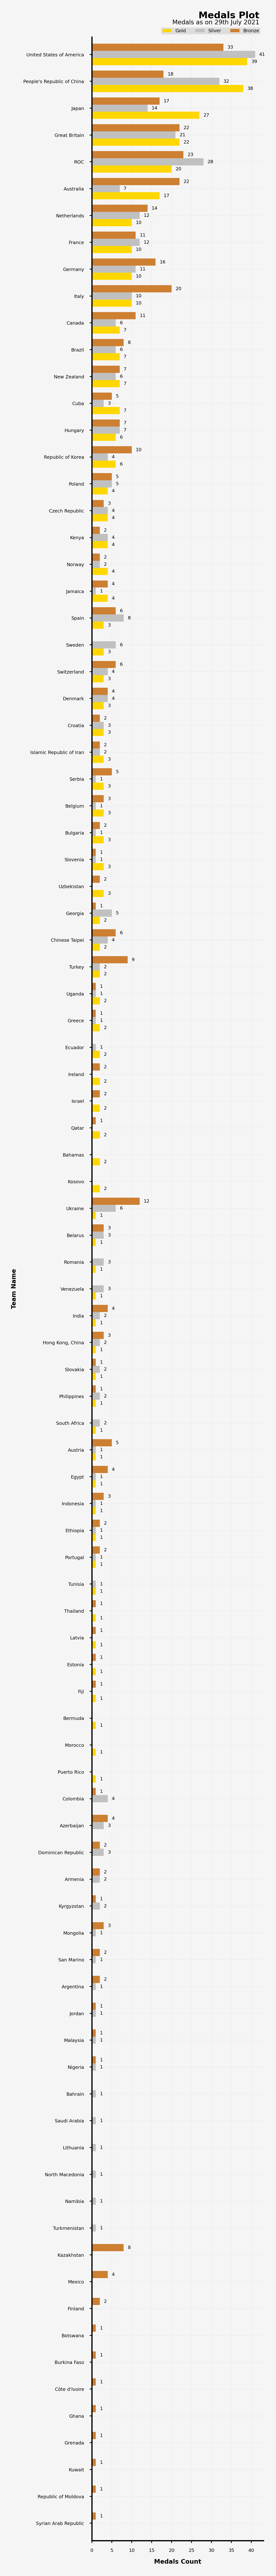

In [24]:
medals = medals.sort_index(ascending=False)
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,30), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700','#C0C0C0','#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = medals.plot(x='Team/NOC',y=['Gold','Silver','Bronze'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Medals Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Team Name',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver','Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}'
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.71, f'Medals Plot', fontsize=6, weight='bold',ha='right')
ax0.text(Xend-1, Yend+0.48,f'Medals as on 29th July 2021',fontsize=4,ha='right')

plt.show()

## Gender

In [7]:
gender.info()
gender.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


,count,mean,std,min,25%,50%,75%,max
Female,46.0,118.086957,147.169717,10.0,42.75,90.0,138.75,969.0
Male,46.0,127.913043,166.900746,0.0,40.25,97.5,149.75,1072.0
Total,46.0,246.000000,312.461340,19.0,85.50,190.0,288.75,2041.0


In [8]:
gender.sort_values(by='Total',inplace=True)
gender.head()

,Discipline,Female,Male,Total
12,Cycling BMX Freestyle,10,9,19
40,Trampoline Gymnastics,16,16,32
35,Surfing,20,20,40
34,Sport Climbing,20,20,40
13,Cycling BMX Racing,24,24,48


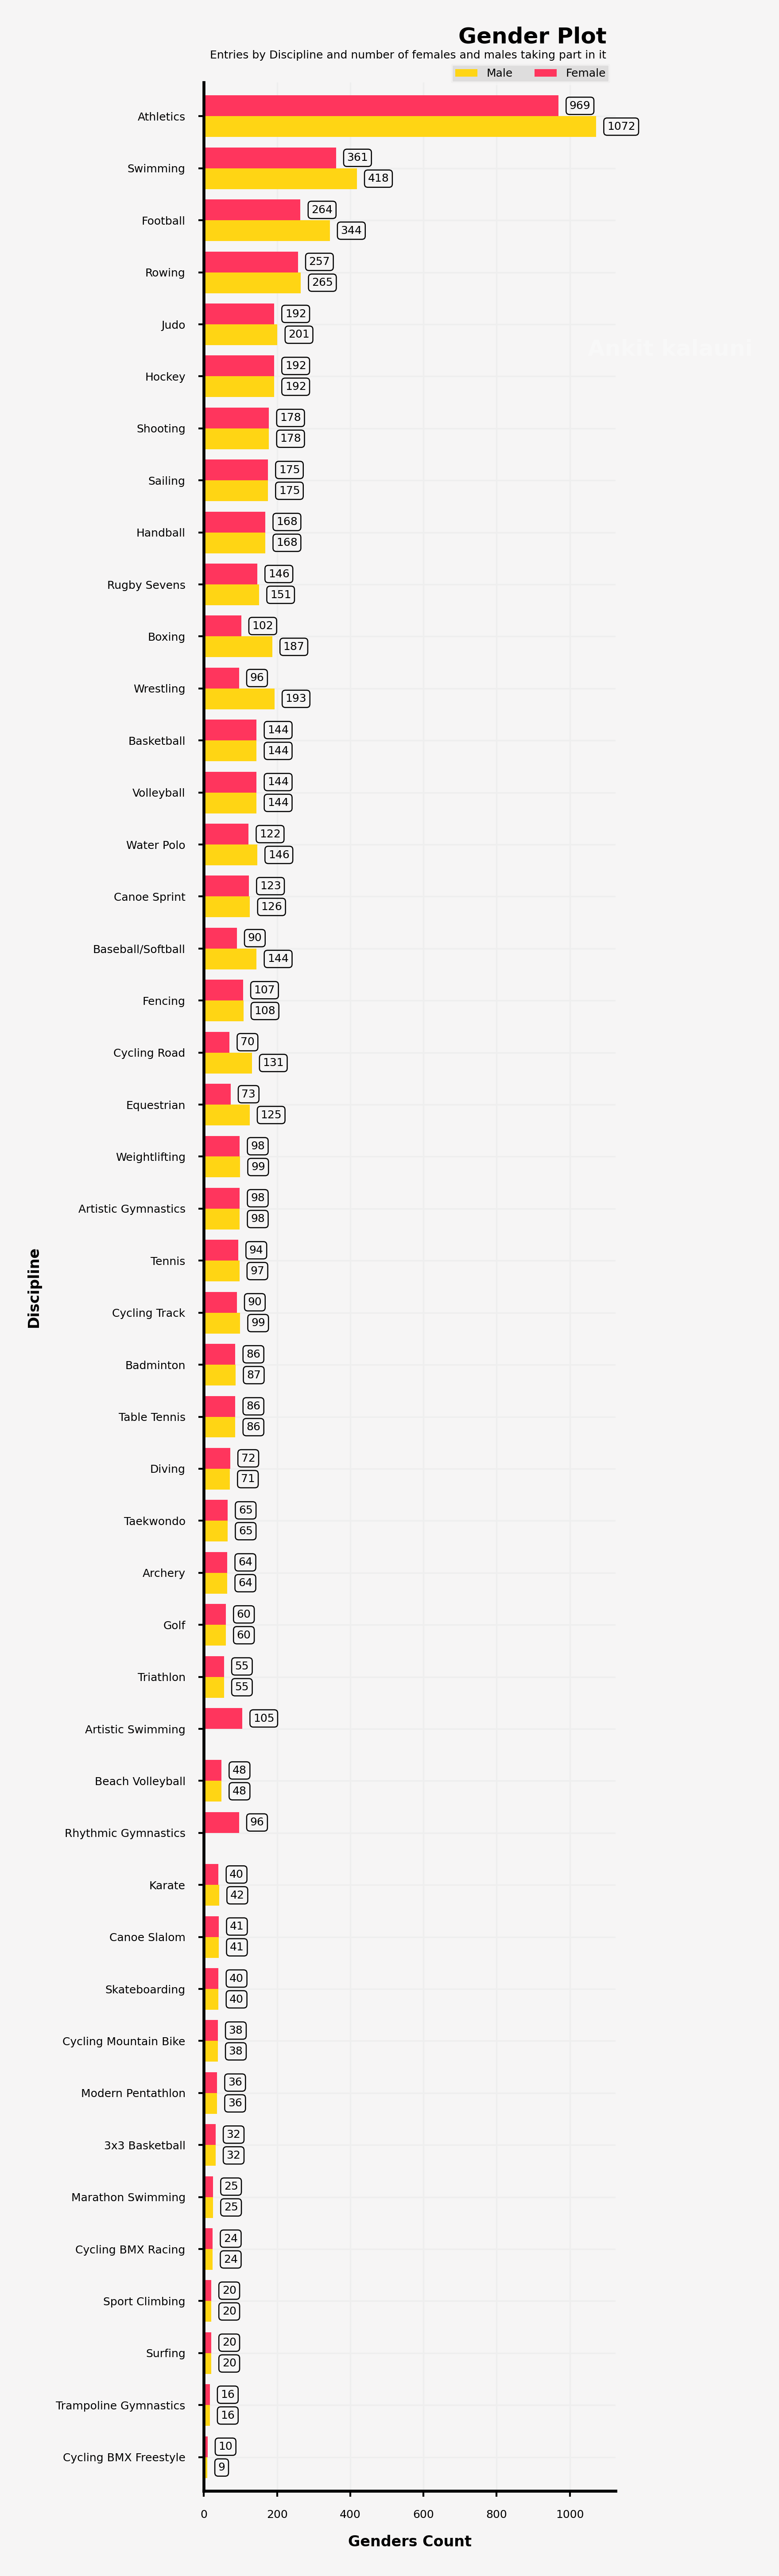

In [9]:
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514','#ff355d'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plot
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2 
                ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


ax0_sns.text(1100,46.4, f'Gender Plot', fontsize=6, weight='bold',ha='right')
ax0.text(1100, 46.11,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='right')
ax0_sns.text(1500,40.4, f'Ankit kalauni', fontsize=6, weight='bold',ha='right',color='w',alpha=0.3) #ignore this line if you reading this

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## Athletes EDA

In [10]:
athletes.info()
athletes.describe().T
athletes.sort_values(by='NOC', inplace=True)
athletes.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, AALERUD Katrine to ZYZANSKA Sylwia
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         11085 non-null  object
 1   Discipline  11085 non-null  object
dtypes: object(2)
memory usage: 259.8+ KB


,NOC,Discipline
Name,,
YOVARI Mahdi,Afghanistan,Shooting
YOUSOFI Kimia,Afghanistan,Athletics
MANSOURI Farzad,Afghanistan,Taekwondo
NOOR ZAHI Sha Mahmood,Afghanistan,Athletics
ANWARI Fahim,Afghanistan,Swimming
DELILAJ Manuela,Albania,Shooting
CULLHAJ Indrit,Albania,Judo
PETROV Matvei,Albania,Artistic Gymnastics
SMAJLAJ Izmir,Albania,Athletics


In [11]:
athletes.NOC.value_counts()

United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
                             ... 
Saint Kitts and Nevis           2
Myanmar                         2
Marshall Islands                2
Andorra                         2
Brunei Darussalam               2
Name: NOC, Length: 206, dtype: int64

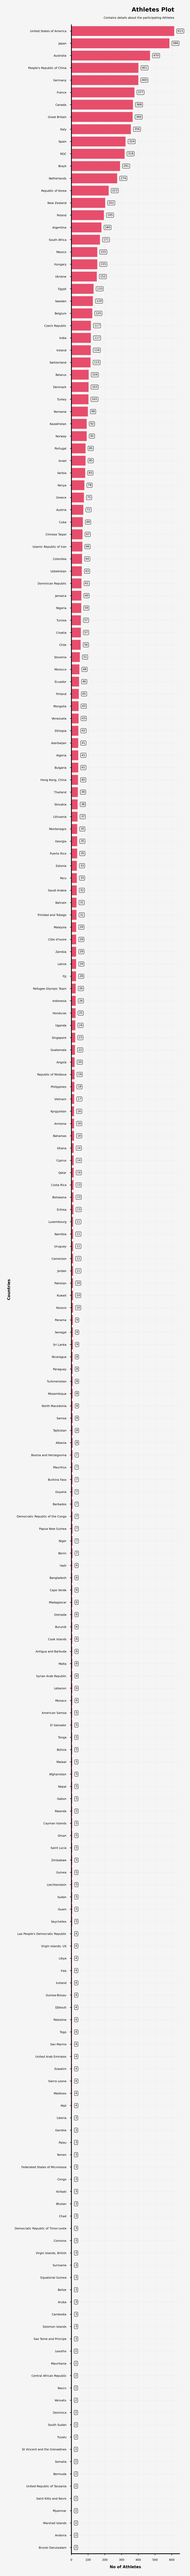

In [14]:
y = athletes.NOC.value_counts().index
x = athletes.NOC.value_counts().values

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(2,48), facecolor='#f6f5f5')

gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=athletes,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Athletes',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)


for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax0_sns.text(615,-1.6, f'Athletes Plot', fontsize=6, weight='bold',ha='right')
ax0.text(615,-1,f'Contains details about the participating Athletes',fontsize=3,ha='right')


plt.show()

## Teams EDA

In [17]:
teams.describe()


,Discipline,NOC,Event
count,743,743,743
unique,20,84,36
top,Swimming,Japan,Men
freq,113,48,120


In [18]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, Belgium to United States
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  743 non-null    object
 1   NOC         743 non-null    object
 2   Event       743 non-null    object
dtypes: object(3)
memory usage: 23.2+ KB


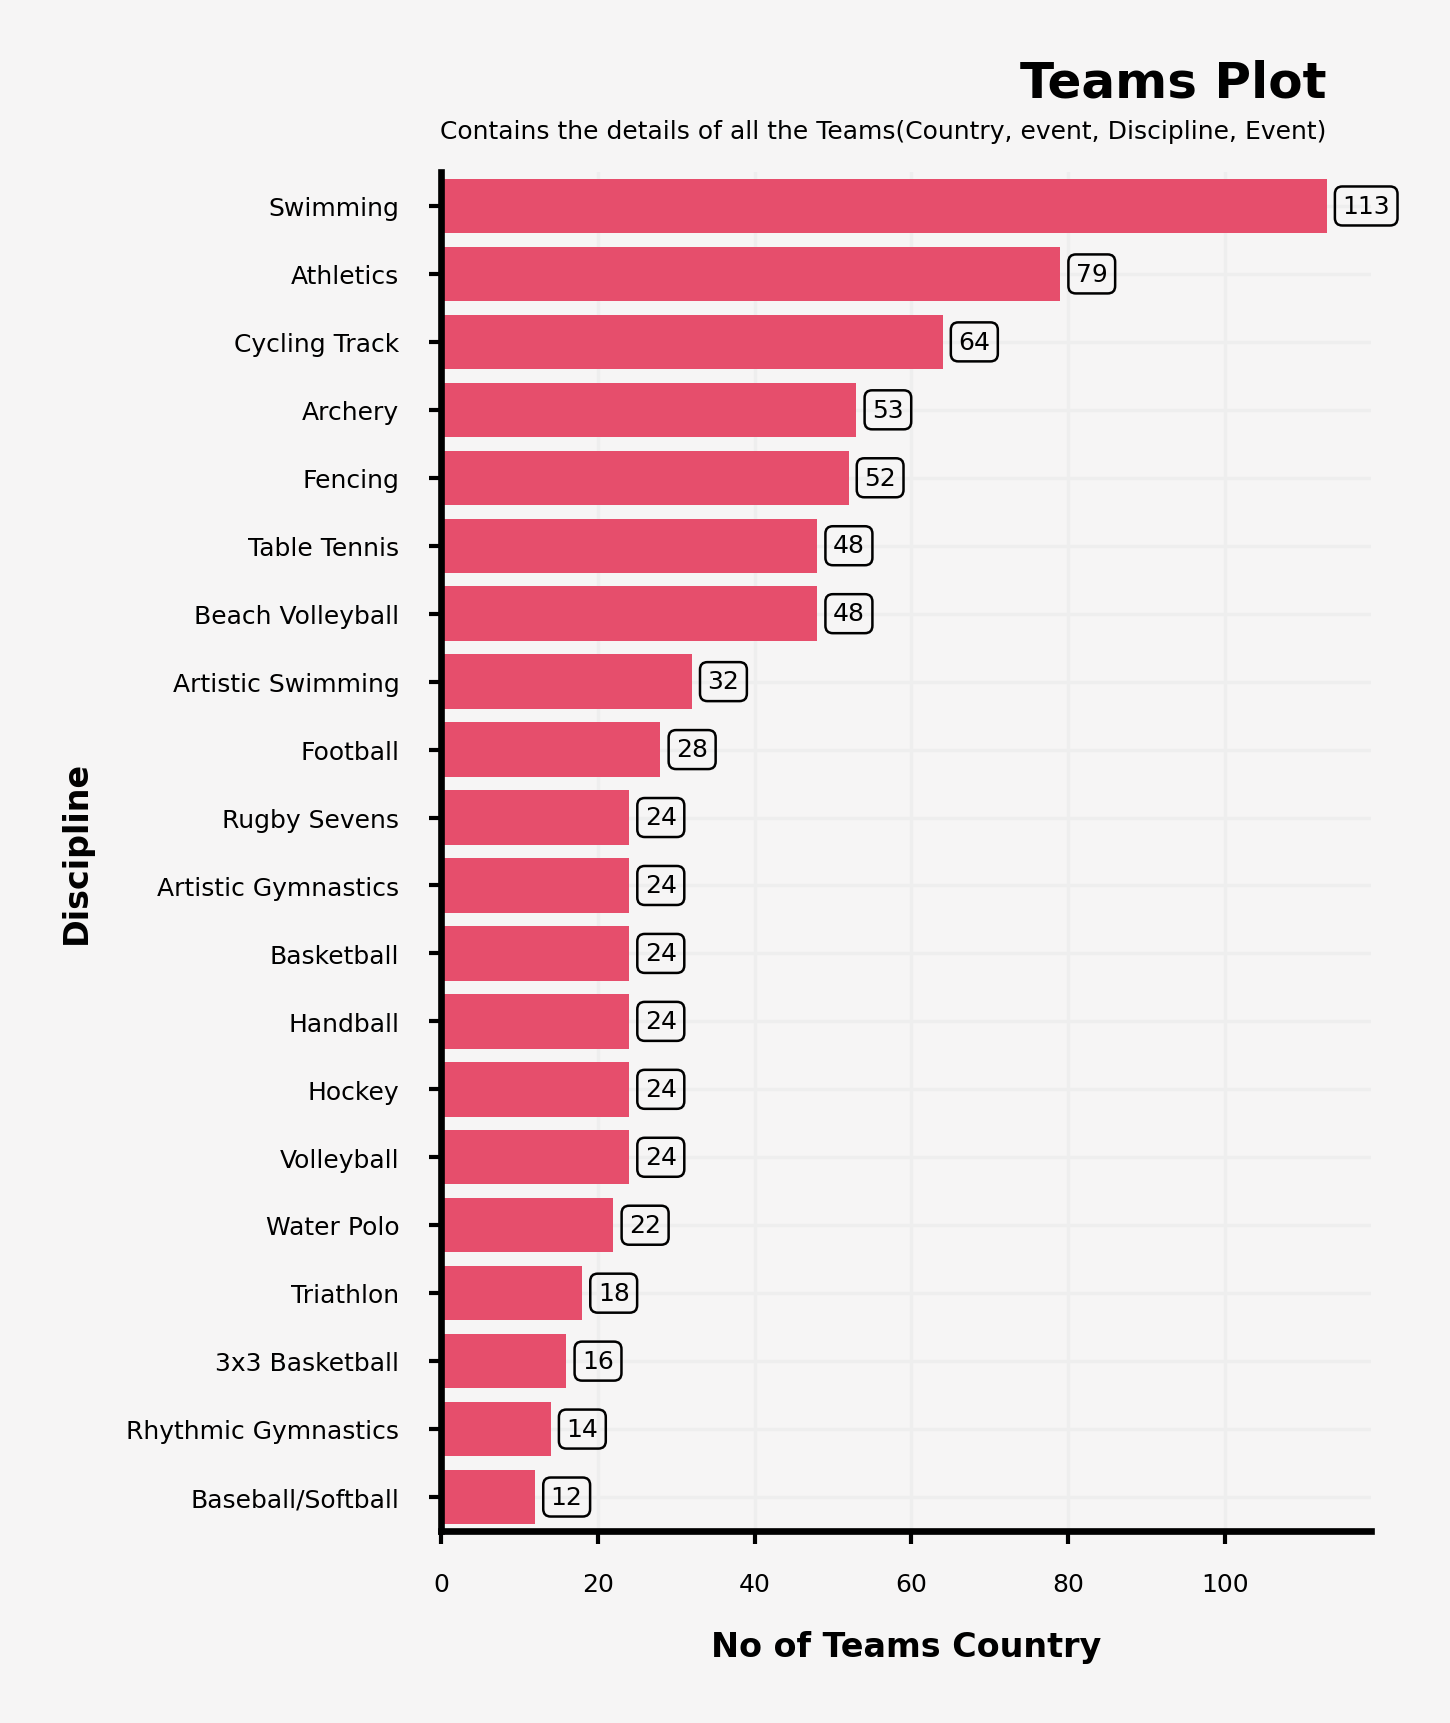

In [19]:
y = teams.Discipline.value_counts().index
x = teams.Discipline.value_counts().values

# Teams barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=teams,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Teams Country',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)


for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))



Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(113,-1.6, f'Teams Plot', fontsize=6, weight='bold',ha='right')
ax0.text(113,-1,f'Contains the details of all the Teams(Country, event, Discipline, Event)',fontsize=3,ha='right')


plt.show()